<a href="https://colab.research.google.com/github/tayfununal/hamiltonian_ex/blob/main/eulerverlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt

def symplectic_euler(h=0.1, initial_point= [1., 0.]):

    t = np.arange(0, 2*np.pi, h)

    q = np.zeros(t.shape[0])
    p = np.zeros(t.shape[0])

    q[0] = initial_point[0]
    p[0] = initial_point[1]
    
    for i in range(0, t.shape[0]-1):
      q[i + 1] = (1-h**2) * q[i] + h * p[i]
      p[i + 1] = p[i] - h * q[i]

    return q, p, t

q , p, t = symplectic_euler()
print("shape of q :", q.shape ,"\nshape of p:", p.shape, "\nsize of t:", len(t))

shape of q : (63,) 
shape of p: (63,) 
size of t: 63


In [283]:
def grand_truth_plot(h = 0.1):
  t = np.arange(0,7,0.1)
  x = np.cos(t)
  y = np.sin(t)
  plt.scatter(x,y)

def pred_plot(q, p):
  plt.plot(p[:, ], q[:,], c = "red")
  plt.xlabel('q')
  plt.ylabel('p')

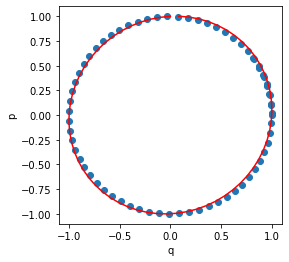

In [284]:
plt.figure(figsize = (4, 4))

# Simplectic solution plot
pred_plot(q=q, p=p)

# Grand truth solution plot
grand_truth_plot()
plt.show()

In [285]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

In [286]:
target = np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1)
"""shuffling = np.concatenate((target, t.reshape(-1,1)), axis=1)
np.random.shuffle(shuffling)

target = np.concatenate((shuffling[:,0].reshape(-1,1), shuffling[:,1].reshape(-1,1)), axis=1)
t = shuffling[:,2]
print('target:',target, '\nt:',t)"""

"shuffling = np.concatenate((target, t.reshape(-1,1)), axis=1)\nnp.random.shuffle(shuffling)\n\ntarget = np.concatenate((shuffling[:,0].reshape(-1,1), shuffling[:,1].reshape(-1,1)), axis=1)\nt = shuffling[:,2]\nprint('target:',target, '\nt:',t)"

In [287]:
inp = Input(shape=(1,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_90 (Dense)            (None, 64)                128       
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 dense_92 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [288]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt , loss="mse")
model.fit(x=t, y=target , epochs=1000, batch_size=16)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8688
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5300
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4806
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4043
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4026
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3893
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3595
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3444
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3327
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3218
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3108
Epoch 13/1000
4/4 [==============================

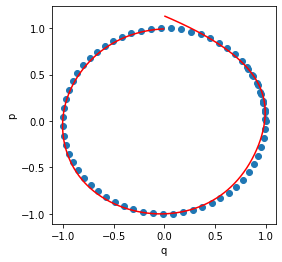

In [289]:
# prediction q and p Using NN and with test_t 
test_t = np.arange(0, 2*np.pi, 0.001)
prediction = model(test_t).numpy()

q = prediction[:,0]
p = prediction[:,1]

plt.figure(figsize = (4, 4))

# NN with mse solition 
pred_plot(q, p )

# Grand truth solution plot
grand_truth_plot()

plt.show()

In [290]:
# NN model with Hamiltonian preserved loss
inp = Input(shape=(2,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model2 = Model(inputs=inp, outputs=out)

In [291]:
def H(z):
  return tf.reduce_sum((z**2)/2,axis=1)

def custom_loss(y_true, y_pred):
  return (1/32) *(y_true - H(y_pred))**2

In [292]:
# Hamiltonian preserved for initial point and we extend this for all test_t
h_0 = np.array([0.5 for i in range(test_t.shape[0])])

In [293]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=opt, loss=custom_loss)
model2.fit(x = prediction, y = h_0, epochs=100, batch_size=32)

Epoch 1/100
197/197 [==============================] - 1s 2ms/step - loss: 1.6283e-04
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 9.6271e-06
Epoch 3/100
197/197 [==============================] - 0s 2ms/step - loss: 8.2359e-06
Epoch 4/100
197/197 [==============================] - 0s 2ms/step - loss: 7.6753e-06
Epoch 5/100
197/197 [==============================] - 0s 2ms/step - loss: 7.8799e-06
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 8.1281e-06
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 7.6785e-06
Epoch 8/100
197/197 [==============================] - 0s 2ms/step - loss: 7.0923e-06
Epoch 9/100
197/197 [==============================] - 0s 2ms/step - loss: 8.5376e-06
Epoch 10/100
197/197 [==============================] - 0s 2ms/step - loss: 6.8675e-06
Epoch 11/100
197/197 [==============================] - 0s 2ms/step - loss: 7.6890e-06
Epoch 12/100
197/197 [==============================

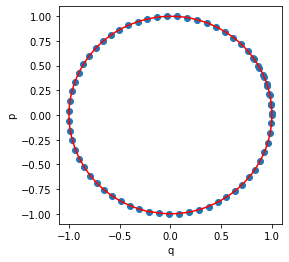

In [294]:
test_t = np.arange(0, 2*np.pi, 0.0001)

prediction_with_hamiltonian_preserved = model2(model(test_t))

q = prediction_with_hamiltonian_preserved[:,0]
p = prediction_with_hamiltonian_preserved[:,1]

plt.figure(figsize = (4, 4))
pred_plot(q=q, p=p)

grand_truth_plot()
plt.show()

In [295]:
#verlet
import math
import numpy as np

def verlet(h = 0.5, num_steps = 10):
  
  pv = np.zeros(num_steps + 1)
  qv = np.zeros(num_steps + 1)

  pv[0] = 0
  qv[0] = 1
  
  for i in range(0 ,num_steps):
    ara_p = pv[i] - h/2 * qv[i]

    qv[i+1] = qv[i] + h * (pv[i] - h/2 * qv[i])

    pv[i+1] = ara_p - h/2 * (qv[i] + h * (pv[i] - h/2 * qv[i]))

  return pv,qv

pv, qv = verlet()
print("p", pv ,"\nq", qv)

p [ 0.         -0.46875    -0.8203125  -0.96679688 -0.87158203 -0.55847168
 -0.10574341  0.37342072  0.75922966  0.95523119  0.91242492] 
q [ 1.          0.875       0.53125     0.0546875  -0.43554688 -0.81689453
 -0.99401855 -0.92263794 -0.62059784 -0.16340828  0.33463335]


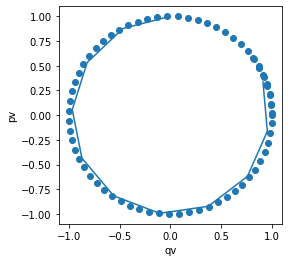

In [296]:
plt.figure(figsize = (4, 4))
plt.plot(pv[:, ], qv[:,])
plt.xlabel('qv')
plt.ylabel('pv')
t=np.arange(0,7,0.1)
x=np.cos(t)
y=np.sin(t)
plt.scatter(x,y)
plt.show()
      

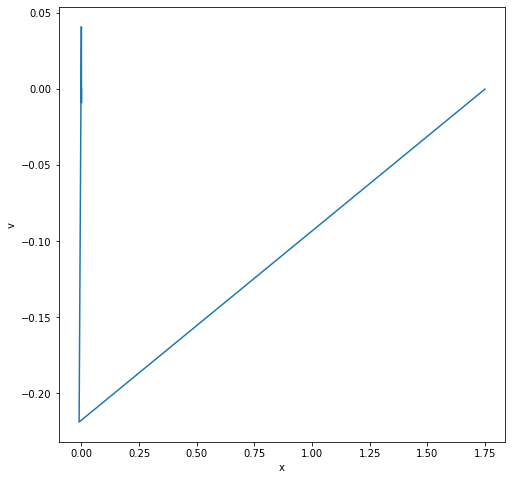

In [297]:
import numpy as np
import matplotlib.pyplot as plt
    

N = 1000
x0 = 1
w=1
h=0.5
  
t = np.linspace(0,100,N)
dt = t[1]-t[0]


pv1 = np.zeros(N)
qv1 = np.zeros(N)
pv1[0] = 2 + 0.25 * math.cos(math.pi)
qv1[0] = 2 * math.sin(math.pi)

for i in range(N-1):
    
    pv1[(i+1)//2] = pv1[i] - h*qv1[i]/2
    qv1[i+1] = qv1[i] + h*(pv1[i] - h*qv1[i]/2)
    qv1[i+1] = pv1[i+1]/2 - h/2*(qv1[i] + h*(pv1[i] - h/2*qv1[i]))

plt.figure(figsize = (8, 8))
plt.plot(pv1[:, ], qv1[:,])
plt.xlabel('x')
plt.ylabel('v')
plt.show()


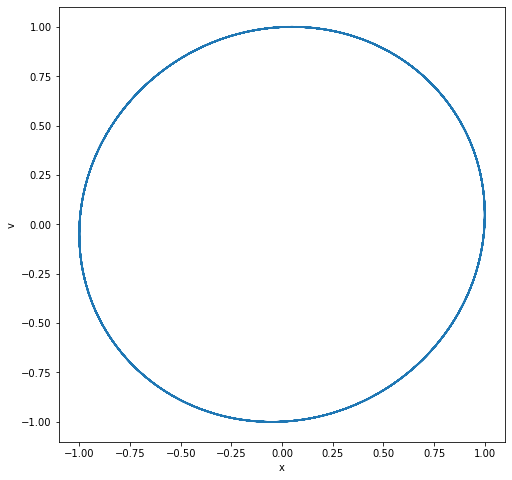

 [ 1.          0.98997997  0.97004031  0.94038082  0.90129868  0.85318551
  0.79652339  0.73188008  0.65990331  0.58131429  0.49690048  0.40750772
  0.31403171  0.2174091   0.11860804  0.01861853 -0.08155754 -0.1809164
 -0.27846248 -0.37321835 -0.46423456 -0.55059913 -0.63144668 -0.70596711
 -0.77341374 -0.83311073 -0.88445993 -0.92694681 -0.96014566 -0.98372382
 -0.99744504 -1.00117183 -0.99486685 -0.97859327 -0.95251416 -0.91689083
 -0.87208022 -0.81853134 -0.75678076 -0.68744721 -0.61122542 -0.52887913
 -0.44123345 -0.3491666  -0.2536011  -0.1554945  -0.05582984  0.04439423
  0.14417347  0.24250809  0.33841277  0.43092655  0.51912243  0.60211668
  0.67907771  0.74923436  0.81188366  0.86639786  0.91223073  0.94892301
  0.97610706  0.99351049  1.00095892  0.9983777   0.98579271  0.96333005
  0.93121479  0.88976874  0.83940717  0.78063472  0.71404028  0.64029114
  0.56012626  0.4743489   0.38381855  0.28944233  0.19216589  0.09296394
 -0.00716952 -0.10723113 -0.20621829 -0.30313913 -0

In [298]:
#leapfrog
import numpy as np
import matplotlib.pyplot as plt
    

N = 1000
x0 = 1
w=1
    
t = np.linspace(0,100,N)
dt = t[1]-t[0]


x = np.zeros(N)
v = np.zeros(N)
x[0] = x0
v[0] = 0
for i in range(N-1):
    
  v[i+1] = v[i] + (-w**2) * x[i] * dt
  x[i+1] = v[i+1] * dt + x[i]


plt.figure(figsize = (8, 8))
plt.plot(x[:, ], v[:,])
plt.xlabel('x')
plt.ylabel('v')
plt.show()
print("", x ,"", v)

In [299]:
import numpy as np
k = 1
N = 1000
x0 = 1
w=1
    
t = np.linspace(0,100,N)
dt = t[1]-t[0]

x1 = np.zeros(N)
v1 = np.zeros(N)
x1[0] = x0
v1[0] = 0
def leapfrog() :
  for i in range (N-1) :
    v1[i+1] = v1[i] + (-w**2) * x1[i] * dt
    x1[i+1] = v1[i+1] + dt * x1[i]

    return v1,x1

leapfrog()




(array([ 0.       , -0.1001001,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0. 